## 1. Recommender system
When you watch YouTube, order food online, buy books online, listen to Spotify, use LinkedIn, you constantly receive recommendations for new videos, dishes, etc. What lies behind these is a type of recommender system.

# Recommender System:

- Part of unsupervised machine learning, recommender systems analyze patterns in data to make personalized recommendations to users.

# Recommender system have two types.

- 1:Content-Based Filtering
    - This method looks at what users have liked in the past and recommends similar items. It's like when you watch a movie on a streaming platform, and it suggests other films with similar themes or actors based on your preferences and the content of the movies themselves.


- 2: Colloborative Filtering
    - Instead of focusing on the characteristics of items, collaborative filtering pays attention to what similar users have liked. It's like when you see recommendations on an online store based on what other shoppers with similar tastes have purchased or liked.


# Problem in recommending system

- Cold start problem
    -  Occurs when there is limited data for new users or items, making it challenging to provide accurate recommendations. Strategies like hybrid systems are used to address this issue effectively.

# The combination of above both filtering

- Hybrid Recommender System
    - This system combines different recommendation approaches to improve accuracy. For instance, it might blend content-based and collaborative filtering methods to offer more personalized suggestions. It's like when a music app combines your listening history with the preferences of users similar to you to recommend songs, especially when you're new to the platform.



#  1.1 - Movielens full - EDA
Now download the dataset ml-latest.zip under the section "recommended for education and development". Read the data sets "movies.csv" and "ratings.csv" answer the following questions below.
- a) Do an EDA to understand the dataset. Include different types of plots. Do not limit yourself to the questions below, but try to examine more aspects of the data.


# EDA for Movies Data

In [5]:
import pandas as pd

# Laod the movies data
df_movies = pd.read_csv("../data/movies.csv")

# See the first 5 data of the list
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# see the last data values of list

df_movies.tail()

,movieId,title,genres
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller
86536,288983,UNZIPPED: An Autopsy of American Inequality (2...,Documentary


In [7]:
# See the different values of data like , Count , Mean , std , min and more ...

df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [8]:
# Compute the number of unique titles in the "title" column of the DataFrame
unique_title = df_movies["title"].nunique()

# Compute the number of unique movieIds in the "movieId" column of the DataFrame
unique_movies = df_movies["movieId"].nunique()

print(f"The unique values for titles = {unique_title}")
print(f"The unique values for moviesId = {unique_movies}")

The unique values for titles = 86330
The unique values for moviesId = 86537


In [9]:
# Check for missing values
missing_values = df_movies.isnull().sum()
missing_values

movieId    0
title      0
genres     0
dtype: int64

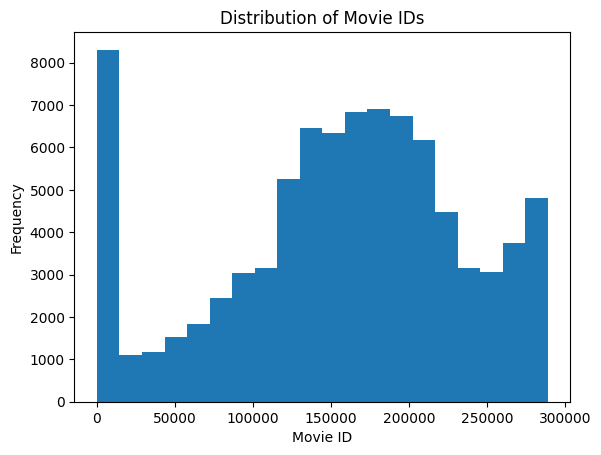

In [10]:
import matplotlib.pyplot as plt

# Histogram for movieId
plt.hist(df_movies['movieId'], bins=20)
plt.xlabel('Movie ID')
plt.ylabel('Frequency')
plt.title('Distribution of Movie IDs')
plt.show()



# EDA for Rating Data

In [11]:
# Load the Rating data for movies 
df_rating = pd.read_csv("../data/ratings.csv")

# See the top 5 values of the list
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [12]:
# See the last values of the list
df_rating.tail()

,userId,movieId,rating,timestamp
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765
33832161,330975,8783,2.5,1091581799


In [13]:
# check for missing values

missing_values = df_rating.isnull().sum()
missing_values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
# See the different values of data like , Count , Mean , std , min and more ...
df_rating.describe()

,userId,movieId,rating,timestamp
count,3.383216e+07,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542540e+00,1.269362e+09
std,9.534122e+04,4.992865e+04,1.063959e+00,2.541023e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,8.295300e+04,1.219000e+03,3.000000e+00,1.046718e+09
50%,1.661290e+05,3.263000e+03,4.000000e+00,1.264740e+09
75%,2.474500e+05,4.049100e+04,4.000000e+00,1.496919e+09
max,3.309750e+05,2.889830e+05,5.000000e+00,1.689843e+09


# b) What are the 10 movies with the most ratings?

In [15]:
df_rating = pd.read_csv("../data/ratings.csv")
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [16]:
import pandas as pd 

count_movie_rating = df_rating.groupby("movieId")["rating"].count()

sort_count_list = count_movie_rating.sort_values(ascending= False)

top_10 = sort_count_list.head(10)

top_10 = top_10.reset_index() 

top_10 = top_10.rename(columns={'rating': 'rating_count'})

top_10 = pd.merge(top_10 , df_movies , on='movieId').drop(columns='genres')

top_10

,movieId,rating_count,title
0,318,122296,"Shawshank Redemption, The (1994)"
1,356,113581,Forrest Gump (1994)
2,296,108756,Pulp Fiction (1994)
3,2571,107056,"Matrix, The (1999)"
4,593,101802,"Silence of the Lambs, The (1991)"
5,260,97202,Star Wars: Episode IV - A New Hope (1977)
6,2959,86207,Fight Club (1999)
7,527,84232,Schindler's List (1993)
8,480,83026,Jurassic Park (1993)
9,1196,80200,Star Wars: Episode V - The Empire Strikes Back...


# c) Calculate the average rating for these 10 movies with the most ratings.

In [17]:
rating_count = df_rating['movieId'].value_counts()
top_10= rating_count.head(10)

top_10_movies_data = df_rating[df_rating['movieId'].isin(top_10.index)]

top_10_movies_data_average = top_10_movies_data.groupby('movieId')['rating'].mean()

top_10_movies_data_average = pd.merge(top_10_movies_data_average , df_movies , on='movieId').drop(columns='genres')

top_10_movies_data_average

,movieId,rating,title
0,260,4.092400,Star Wars: Episode IV - A New Hope (1977)
1,296,4.191778,Pulp Fiction (1994)
2,318,4.416792,"Shawshank Redemption, The (1994)"
3,356,4.068189,Forrest Gump (1994)
4,480,3.689013,Jurassic Park (1993)
5,527,4.242337,Schindler's List (1993)
6,593,4.150287,"Silence of the Lambs, The (1991)"
7,1196,4.118030,Star Wars: Episode V - The Empire Strikes Back...
8,2571,4.160631,"Matrix, The (1999)"
9,2959,4.236019,Fight Club (1999)


# d) Plot the years and number of movies represented in the dataset.


In [18]:
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)$')


df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,2021
86533,288971,Ouija Japan (2021),Action|Horror,2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,2023


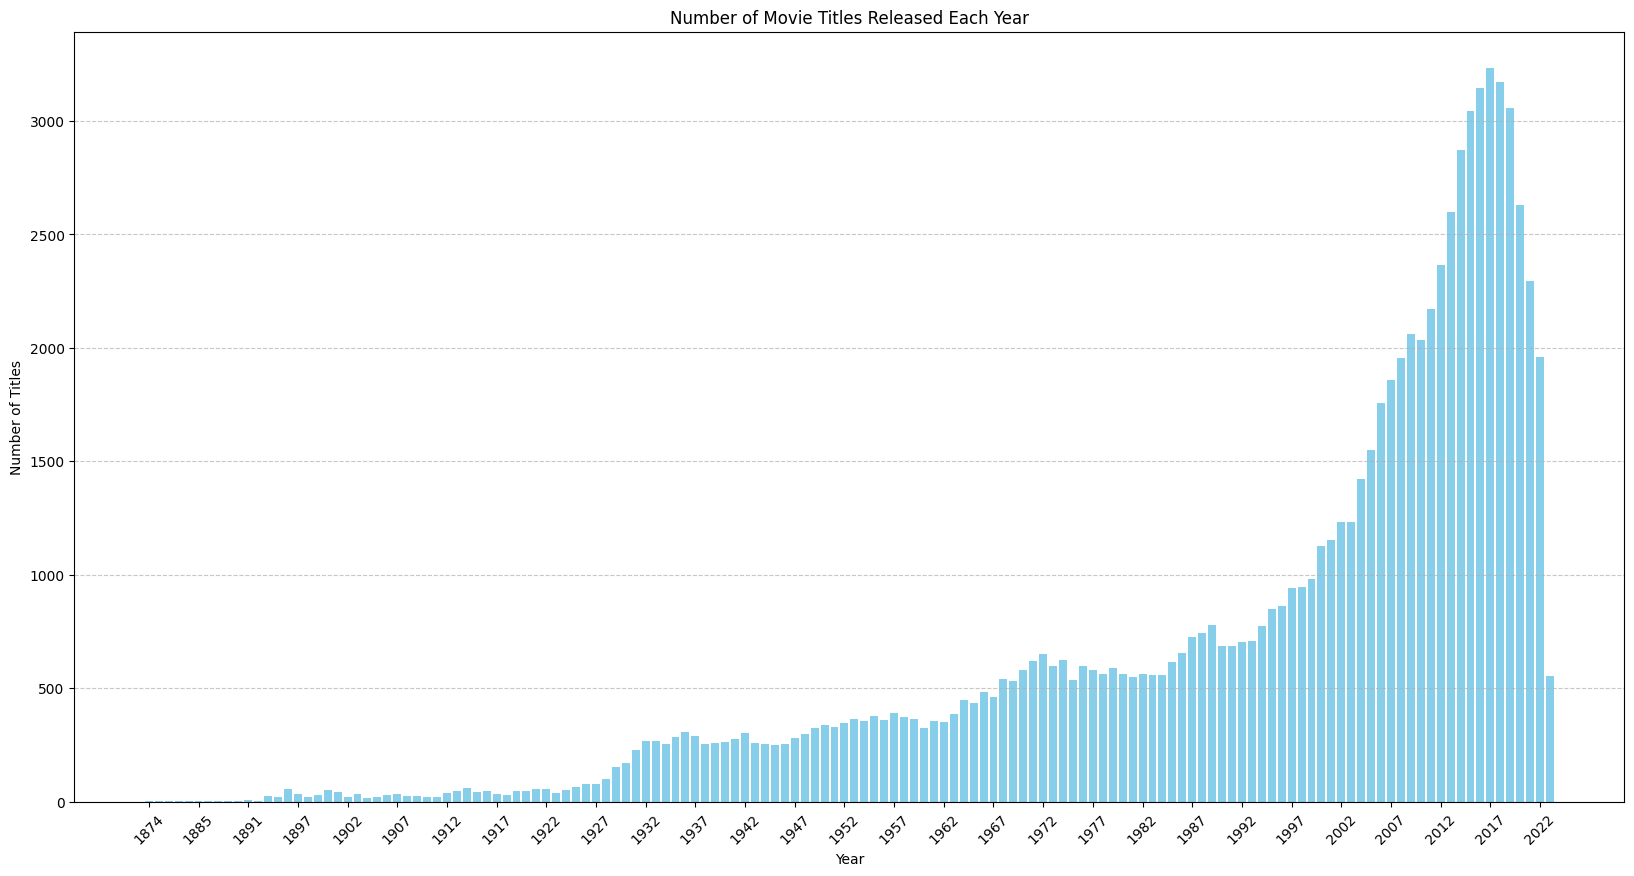

In [19]:
import matplotlib.pyplot as plt

# Group by 'year' and count the number of titles for each year
titles_per_year = df_movies.groupby('year')['title'].count()

# Plotting
plt.figure(figsize=(20, 10))
plt.bar(titles_per_year.index, titles_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movie Titles Released Each Year')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(titles_per_year.index[::5], rotation=45)

plt.show()


# e) Make a plot of the number of ratings against movieId.

In [20]:
rating_count = df_rating.groupby('movieId').size().reset_index(name='rating_count')

rating_count = rating_count[rating_count['rating_count'] > 1500]

rating_count


,movieId,rating_count
0,1,76813
1,2,30209
2,3,15820
3,4,3028
4,5,15801
...,...,...
75707,263407,2340
77018,268642,3366
77558,270698,3947
78400,274053,3262


In [21]:
# Group by movieId and count the number of ratings
rating_count = df_rating.groupby('movieId').size().reset_index(name='rating_count')

# Filter for movieId values less than or equal to 150000
rating_count = rating_count[rating_count['movieId'] <= 150000]

# Filter for movies with more than 1500 ratings
rating_count = rating_count[rating_count['rating_count'] > 1500]

rating_count


,movieId,rating_count
0,1,76813
1,2,30209
2,3,15820
3,4,3028
4,5,15801
...,...,...
34098,146656,3260
34826,148626,15980
34848,148671,1637
35100,149334,3295


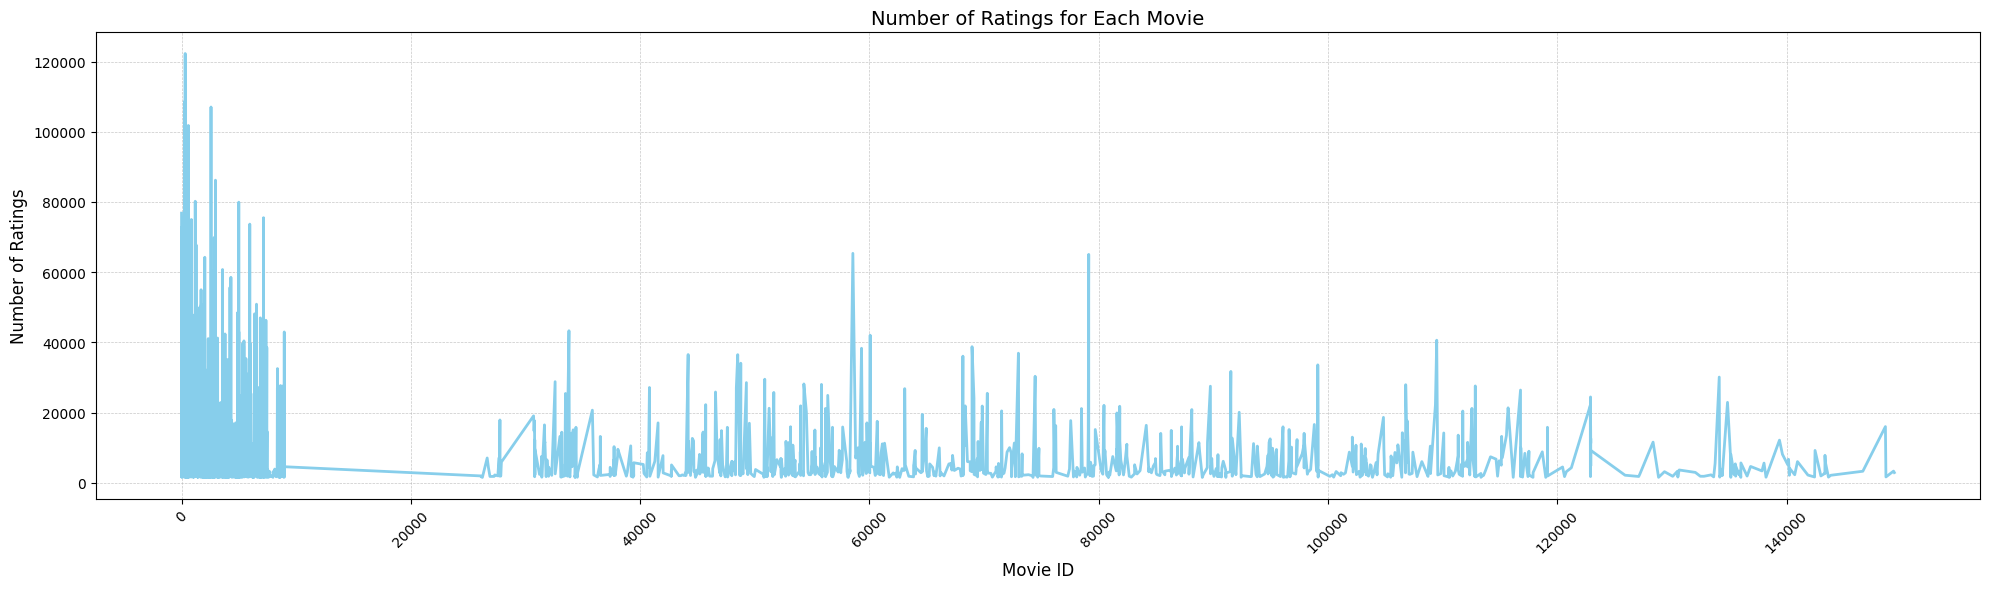

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(rating_count['movieId'], rating_count['rating_count'], color='skyblue', linewidth=2)
plt.xlabel('Movie ID', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Number of Ratings for Each Movie', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  
plt.show()


# f) Calculate average ratings for the top 10 movies with the most ratings. Make a bar graph of these.



In [23]:
rating_count = df_rating['movieId'].value_counts()
top_10= rating_count.head(10)

top_10_movies_data = df_rating[df_rating['movieId'].isin(top_10.index)]

top_10_movies_data_average_plot = top_10_movies_data.groupby('movieId')['rating'].mean()

top_10_movies_data_average_plot


movieId
260     4.092400
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float64

In [24]:
x = list(map(str, top_10_movies_data_average_plot.index.tolist()))

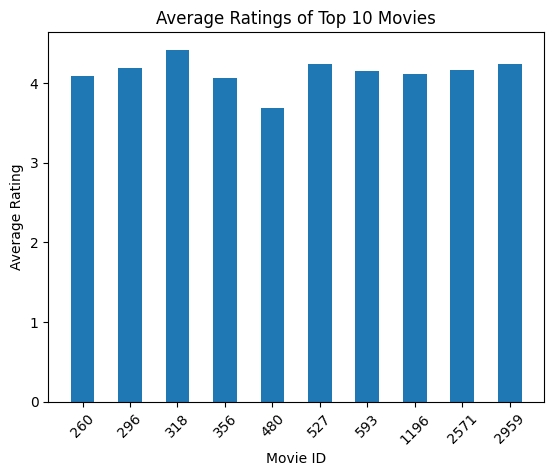

In [25]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 5))

plt.bar(x=x , height=top_10_movies_data_average_plot.values, width=.5)  # Removed marker and linestyle parameters

plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Top 10 Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


# 1.2 Create sparse matrix

As in the video in task 1.0, you created a pivot table of the dataframe with index: "movieId", columns: "userId" and values: "ratings". However, this pivot table is "expensive" to create and your computer probably won't be able to create it unless you filter out some data. Think of a suitable way to filter your data set, try your hand at it and justify it.
Create a sparse matrix of this pivot table using scipy.sparse.csc_matrix(). If you want to use all the data, it can also be solved, but you need to solve how to create the sparse matrix without pandas pivot table.

In [26]:
import pandas as pd
import numpy as np


# Load Movies data 
movies_df = pd.read_csv("../data/movies.csv")


# Drop Genres column from the data
movies_df = movies_df.drop(columns=["genres"])

# Let me make the fist the year column
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)$')

# Convert the 'year' column to integer
movies_df['year'] = pd.to_numeric(movies_df['year'])


# By this code i want only the movie data which are releasted after 1960
movies_df = movies_df[movies_df['year'] > 1960]


movies_df


,movieId,title,year
0,1,Toy Story (1995),1995.0
1,2,Jumanji (1995),1995.0
2,3,Grumpier Old Men (1995),1995.0
3,4,Waiting to Exhale (1995),1995.0
4,5,Father of the Bride Part II (1995),1995.0
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),2021.0
86533,288971,Ouija Japan (2021),2021.0
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),1973.0
86535,288977,Skinford: Death Sentence (2023),2023.0


In [27]:
# Load Rating data 
rating_df = pd.read_csv("../data/ratings.csv")

# Drop timestamp column from data
rating_df = rating_df.drop(columns=["timestamp"])

# Filtering the data so we can clean up plus get the list of movies which rating are more than or equal to 3 
rating_df = rating_df[rating_df['rating'] >= 3]

rating_df

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832153,330975,7139,4.0
33832154,330975,7151,4.0
33832155,330975,7153,4.0
33832159,330975,8622,4.0


In [28]:
# Merg the both movies and rating 

df_rating_movies = pd.merge(movies_df , rating_df , on="movieId")
df_rating_movies

,movieId,title,year,userId,rating
0,1,Toy Story (1995),1995.0,1,4.0
1,1,Toy Story (1995),1995.0,2,5.0
2,1,Toy Story (1995),1995.0,7,4.0
3,1,Toy Story (1995),1995.0,10,3.0
4,1,Toy Story (1995),1995.0,12,5.0
...,...,...,...,...,...
26491528,288951,A Taste of Whale (2022),2022.0,230023,3.5
26491529,288967,State of Siege: Temple Attack (2021),2021.0,47791,3.5
26491530,288975,The Men Who Made the Movies: Howard Hawks (1973),1973.0,154483,4.0
26491531,288977,Skinford: Death Sentence (2023),2023.0,291389,3.0


In [29]:
# Fix the missing values in the titles column
missing_values_in_title = df_rating_movies.dropna(axis=0, subset=["title"])

# See how many times each movie got rated 
rating_per_count = missing_values_in_title.groupby("title")["rating"].count().reset_index().rename(columns={"rating" : "total_rating_count"})
rating_per_count.head()


,title,total_rating_count
0,(2019),21
1,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
2,"""Great Performances"" Cats (1998)",168
3,"""Sr."" (2022)",9
4,#1 Cheerleader Camp (2010),5


In [30]:
rating_with_total = df_rating_movies.merge(rating_per_count , left_on="title" , right_on="title" , how="left")

rating_with_total.head()

,movieId,title,year,userId,rating,total_rating_count
0,1,Toy Story (1995),1995.0,1,4.0,70514
1,1,Toy Story (1995),1995.0,2,5.0,70514
2,1,Toy Story (1995),1995.0,7,4.0,70514
3,1,Toy Story (1995),1995.0,10,3.0,70514
4,1,Toy Story (1995),1995.0,12,5.0,70514


In [31]:
popularity_threshold = 10000
rating_popular_movie = rating_with_total.query('total_rating_count >= @popularity_threshold')
rating_popular_movie.head()

,movieId,title,year,userId,rating,total_rating_count
0,1,Toy Story (1995),1995.0,1,4.0,70514
1,1,Toy Story (1995),1995.0,2,5.0,70514
2,1,Toy Story (1995),1995.0,7,4.0,70514
3,1,Toy Story (1995),1995.0,10,3.0,70514
4,1,Toy Story (1995),1995.0,12,5.0,70514


In [32]:
rating_popular_movie.shape

(14315423, 6)

In [53]:
# Pivot table with Index -> MovieID , Column -> UserId , Values -> Rating 
pivottabe = rating_popular_movie.pivot_table(index='movieId', columns="userId" , values="rating").fillna(0)

pivottabe = pivottabe.reset_index().set_index('movieId')

pivottabe.head(10)


userId,1,2,3,4,5,6,7,8,9,10,...,330965,330966,330967,330968,330970,330971,330972,330973,330974,330975
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
6,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,5.0,4.5,0.0,0.0,0.0,4.0,0.0,0.0,3.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
10,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
11,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [54]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# make sparse metrix of Pivot table 

df = pd.DataFrame(pivottabe)

from scipy.sparse import csr_matrix

# Convert the pivot table directly to a CSR matrix
sparse_matrix = csr_matrix(pivottabe.values)

print(sparse_matrix)

  (0, 0)	4.0
  (0, 1)	5.0
  (0, 6)	4.0
  (0, 9)	3.0
  (0, 11)	5.0
  (0, 19)	3.0
  (0, 22)	4.5
  (0, 30)	3.5
  (0, 33)	4.0
  (0, 40)	4.0
  (0, 42)	3.5
  (0, 48)	5.0
  (0, 50)	3.5
  (0, 51)	4.0
  (0, 54)	3.5
  (0, 60)	5.0
  (0, 64)	3.5
  (0, 68)	4.0
  (0, 74)	4.5
  (0, 77)	5.0
  (0, 83)	5.0
  (0, 89)	4.0
  (0, 90)	3.0
  (0, 91)	4.0
  (0, 92)	3.0
  :	:
  (654, 313357)	5.0
  (654, 313376)	5.0
  (654, 313399)	3.0
  (654, 313437)	5.0
  (654, 313471)	3.5
  (654, 313477)	3.0
  (654, 313484)	5.0
  (654, 313535)	4.0
  (654, 313567)	3.0
  (654, 313585)	4.5
  (654, 313592)	4.0
  (654, 313627)	4.5
  (654, 313642)	5.0
  (654, 313648)	3.0
  (654, 313669)	3.5
  (654, 313704)	4.5
  (654, 313723)	4.5
  (654, 313751)	4.5
  (654, 313840)	3.0
  (654, 313842)	3.5
  (654, 313856)	4.0
  (654, 313886)	5.0
  (654, 313887)	5.0
  (654, 313928)	5.0
  (654, 313956)	3.5


# 1.3 Recommender system

Create a recommender system with KNN and let the system take input from the user and print the top 5 recommended movies, based on the user's search query. Please note that there is a logical error in the video that makes the recommendations not so good, try to find the error and fix it.

In [55]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(pivottabe.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [56]:
pivottabe.shape

(655, 313981)

In [57]:
pivottabe.head()

userId,1,2,3,4,5,6,7,8,9,10,...,330965,330966,330967,330968,330970,330971,330972,330973,330974,330975
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
6,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,5.0,4.5,0.0,0.0,0.0,4.0,0.0,0.0,3.0


In [58]:
pivottabe.tail()

userId,1,2,3,4,5,6,7,8,9,10,...,330965,330966,330967,330968,330970,330971,330972,330973,330974,330975
movieId,,,,,,,,,,,,,,,,,,,,,
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
import numpy as np

# Get user input for the chosen movie
while True:
    chosen_movie = int(input("Enter the movieId of your chosen movie: "))

    if chosen_movie in pivottabe.index:

        # Fetch the title of the chosen movie
        chosen_movie_title = df_movies.loc[chosen_movie, "title"]
        
        # Use the correct index for locating the chosen movie
        query = pivottabe.index.get_loc(chosen_movie)
        distances, indices = model_knn.kneighbors(pivottabe.iloc[query].values.reshape(1, -1), n_neighbors=6)

        print('Recommendations for {0}- {1}:\n'.format(chosen_movie , chosen_movie_title))
        for i in range(1, len(distances.flatten())):
            recommended_movie_id = pivottabe.index[indices.flatten()[i]]
            recommended_movie_title = df_movies.loc[recommended_movie_id, "title"]
            print('{0}: {1}  with distance of {2}:'.format(i, recommended_movie_title, distances.flatten()[i]))
        
        break  
    else:
        print("Sorry, the movieId you entered does not exist in the dataset.")


Sorry, the movieId you entered does not exist in the dataset.
Sorry, the movieId you entered does not exist in the dataset.
Sorry, the movieId you entered does not exist in the dataset.
Sorry, the movieId you entered does not exist in the dataset.
Sorry, the movieId you entered does not exist in the dataset.
Sorry, the movieId you entered does not exist in the dataset.
Sorry, the movieId you entered does not exist in the dataset.
Sorry, the movieId you entered does not exist in the dataset.
Recommendations for 5- Heat (1995):

1: Waiting to Exhale (1995)  with distance of 0.6006619108321828:
2: Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)  with distance of 0.6330488288397285:
3: Vermont Is For Lovers (1992)  with distance of 0.6480682326542624:
4: Tom and Huck (1995)  with distance of 0.64993282476733:
5: Gospa (1995)  with distance of 0.6821895639925342:


# a) Describe in words how your system works.

## My work is consist of following steps. 


### Data Inport
- Movies data has been inported , which have columns like movieId , tilles and the years in which they are released 
- Rating data has bee in poeted , which also have columns like userId , movieId and raitng ( which are between 1 to 5) 

### Data Preparation
- Conducted data cleaning to enhance data understanding and readability.
- Removed the "Genres" column from the movie data to simplify the dataset.
- Filtered the movie data to include only those movies released after 1960, focusing on more recent films.
- Filtered the rating data to include only movies with ratings equal to or greater than 3, indicating positive user feedback.

### Merging Data
- Merged the cleaned movies and ratings data to consolidate relevant information in one dataset for analysis.

### Popularity Filtering
- Filtered out less popular movies by setting a threshold for the total count of ratings, focusing on movies with a substantial number of ratings to ensure statistical significance.

### Pivot Table Creation
- Created a pivot table from the filtered dataset, setting movieIds as index, userIds as columns, and ratings as values. Missing values were filled with 0 to facilitate further analysis.

### Sparse Matrix Conversion
-  Converted the pivot table into a sparse matrix representation to reduce memory usage and optimize computation.

### Model Training
- Instantiated a nearest neighbors model (KNN) with cosine similarity as the distance metric and 'brute' algorithm for efficiency.
- Fitted the model with the movie features sparse matrix to learn the relationships between movies based on their ratings.

### User Input & Recommendation Generation
- Prompted the user to input a movieId of their choice.
- If the chosen movieId exists in the dataset, the system:
    - Located the correct index of the chosen movie in the pivot table.
    - Utilized the trained KNN model to find the nearest neighbors (similar movies) based on the features of the chosen movie.
    - Presented the recommendations along with their distances from the chosen movie.
- If the chosen movieId does not exist in the dataset, an error message was displayed, indicating the absence of the movie in the dataset.And ask the user to enter another movieId to get the recommendation.

# b) Look online and read more about recommender systems and briefly describe how they work. Don't forget to cite the source.

### 1: Introduction to Recommendation Systems:
Recommendation systems are sophisticated algorithms designed to predict and suggest items that users are likely to be interested in. These systems play a crucial role in various online platforms, such as e-commerce websites, streaming services, and social media platforms, by enhancing user experience and engagement. By analyzing user behavior, preferences, and interactions with items, recommendation systems aim to provide personalized recommendations tailored to each user's unique tastes and preferences. The ultimate goal of recommendation systems is to increase user satisfaction, retention, and ultimately, revenue for the platform. This overview draws from a multitude of sources, including academic papers, industry reports, and online resources discussing the fundamental concepts and importance of recommendation systems in modern digital platforms.

-source
- Adomavicius, Gediminas, and Alexander Tuzhilin. "Toward the next generation of recommender systems: A survey of the state-of-the-art and possible extensions." IEEE Transactions on Knowledge and Data Engineering 17, no. 6 (2005): 734-749.

### 2:Types of Recommendation Systems:
Recommendation systems can be broadly categorized into two main types: collaborative filtering and content-based filtering. Collaborative filtering methods analyze user behavior and preferences to identify patterns and similarities among users, recommending items based on the preferences of similar users. On the other hand, content-based filtering methods focus on the attributes and features of items, recommending items that are similar to those the user has liked in the past. This classification is widely discussed in the literature on recommendation systems, including research papers, textbooks, and online tutorials, which provide insights into the different approaches used to generate recommendations.

-source
- Ricci, Francesco, Lior Rokach, and Bracha Shapira. "Introduction to recommender systems handbook." In Recommender Systems Handbook, pp. 1-35. Springer, 2015.


### 3:Collaborative Filtering:
Collaborative filtering is a popular approach in recommendation systems that leverages the collective wisdom of users to make predictions about items. It analyzes user-item interactions, such as ratings, purchases, or views, to identify similarities between users and items. Collaborative filtering techniques include user-based and item-based methods, as well as matrix factorization and deep learning models. These methods use various similarity metrics, such as cosine similarity or Pearson correlation, to compute the similarity between users or items. Collaborative filtering is extensively studied in academic literature, with numerous research papers and books exploring its algorithms, implementations, and applications in real-world systems.

-source
- Koren, Yehuda, Robert Bell, and Chris Volinsky. "Matrix factorization techniques for recommender systems." Computer 42, no. 8 (2009): 30-37.


### 4:Content-Based Filtering:
Content-based filtering recommends items to users based on the attributes or features of the items themselves. It analyzes the content or metadata associated with items, such as text, images, or tags, to identify similarities between items and user preferences. Content-based filtering methods create user profiles based on their interactions with items and recommend items that match the user's profile. These methods often use machine learning algorithms, such as natural language processing or image recognition, to extract features from item content and make recommendations. Content-based filtering is extensively discussed in the literature on recommendation systems, with research papers and articles exploring its effectiveness, challenges, and applications across different domains.

-source
- Pazzani, Michael J., and Daniel Billsus. "Content-based recommendation systems." In The adaptive web, pp. 325-341. Springer, Berlin, Heidelberg, 2007.

### 5:Hybrid Recommendation Systems:
Hybrid recommendation systems combine collaborative filtering and content-based filtering approaches to overcome their respective limitations and provide more accurate and diverse recommendations. These systems leverage the strengths of both approaches to enhance recommendation quality and coverage. Hybrid recommendation systems can be implemented in various ways, such as using ensemble methods, cascading recommendations, or integrating collaborative and content-based models into a single framework. The development and evaluation of hybrid recommendation systems are topics of ongoing research, with many studies investigating their performance and effectiveness in real-world scenarios.

-source
- Burke, Robin. "Hybrid recommender systems: Survey and experiments." User Modeling and User-Adapted Interaction 12, no. 4 (2002): 331-370.

### 6:Challenges and Limitations:
Recommendation systems face several challenges and limitations that impact their performance and effectiveness. These challenges include the cold start problem, where the system struggles to make accurate recommendations for new users or items with limited data. Data sparsity is another challenge, where the system lacks sufficient data to make accurate predictions, especially for niche or long-tail items. Other challenges include scalability, privacy concerns, and algorithmic bias. Addressing these challenges requires innovative solutions and advanced techniques, such as data augmentation, context-aware recommendation, and fairness-aware recommendation algorithms. The study of challenges and limitations in recommendation systems is a vibrant area of research, with many studies proposing novel approaches to overcome these obstacles and improve recommendation quality.

-source
- Ekstrand, Michael D., F. Maxwell Harper, Martijn C. Willemsen, and Joseph A. Konstan. "User perception of differences in recommender algorithms." In Proceedings of the 8th ACM Conference on Recommender systems, pp. 161-168. 2014.